#### In this notebook we load the preprocessed datasaset from the notebook "Preprocessing1" and see how different models perform.

In ModelComparison0.ipynb we noticed that after Oversampling the ositive instances of the dataset all the models performed better.
Here we'll perform directly Oversampling and then compare the models.

This decision is made in order to make the notebook not too long but more important because, always in  ModelComparison0.ipynb,
we noticed that the performance of the classifiers without performing Oversampling where pretty unsatisfying because of the fact that the original distribution is very skewed ( only the 6% of instances are positive).

As before, we change the distribution only in the trainig set and we keep the original distribution in the validation and test sets.

Finally, I decided to perform Oversampling and not SubSampling to not reduce the dimension of the dataset we are taking in consideration.

In [73]:
# dataframe management
import pandas as pd             

# numerical computation
import numpy as np

# visualization library
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24})   


# import matplotlib and allow it to plot inline
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn can generate several warnings, we ignore them
import warnings 
warnings.filterwarnings("ignore")


from sklearn.model_selection import cross_val_score
import sklearn.metrics as mt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score


In [74]:
#Load the dataset from Preprocessinc1.ipynb
print("Loading the Dataset from Preprocessing1.ipynb.. ")
dataset = pd.read_csv("./BagOfWordDataSet1.csv")

Loading the Dataset from Preprocessing1.ipynb.. 


In [75]:
dataset.head()

,Unnamed: 0,aaa,aadhaar,aadhar,aakash,aalto,aaron,aathar,abathroom,abbi,...,zookeep,zoolog,zoologist,zoroastrian,zstsn,zubeen,zuckerberg,zuni,zusak,TARGET
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
dataset = dataset.drop('Unnamed: 0', 1)
dataset.head()

,aaa,aadhaar,aadhar,aakash,aalto,aaron,aathar,abathroom,abbi,abbrevi,...,zookeep,zoolog,zoologist,zoroastrian,zstsn,zubeen,zuckerberg,zuni,zusak,TARGET
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
y = dataset['TARGET']
variables = dataset.columns[dataset.columns!='TARGET']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [78]:
X = dataset[variables]
X.head()

,aaa,aadhaar,aadhar,aakash,aalto,aaron,aathar,abathroom,abbi,abbrevi,...,zone,zookeep,zoolog,zoologist,zoroastrian,zstsn,zubeen,zuckerberg,zuni,zusak
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
#splitting train and test set in a stratified manner
print("splitting train and test set in a stratified manner..")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123, stratify = y)

splitting train and test set in a stratified manner..


We will need also a validation set for parameters tuning:

In [80]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=123, stratify = y_train)

#### Now we can perform Oversampling on the training set:

In [81]:
from pandas import *
df_train= concat([X_train, y_train], axis=1, sort=False)
df_train.head()

,aaa,aadhaar,aadhar,aakash,aalto,aaron,aathar,abathroom,abbi,abbrevi,...,zookeep,zoolog,zoologist,zoroastrian,zstsn,zubeen,zuckerberg,zuni,zusak,TARGET
6374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1717,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
683,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8362,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8855,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
# Class count
count_class_0, count_class_1 = df_train.TARGET.value_counts()
print("negative class instances:")
print(count_class_0)
print("positive class instances:")
print(count_class_1)

print("percentange of positive: " + str(round(count_class_1*100/(count_class_0 + count_class_1),2)))

negative class instances:
7597
positive class instances:
503
percentange of positive: 6.21


In [83]:
# Divide by class
df_class_0 = df_train[df_train['TARGET'] == 0]
df_class_1 = df_train[df_train['TARGET'] == 1]

In [84]:
print("performing Oversampling..")
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
train_over = pd.concat([df_class_0, df_class_1_over], axis=0)

count_class_0, count_class_1 = train_over.TARGET.value_counts()
print("negative class instances:")
print(count_class_0)
print("positive class instances:")
print(count_class_1)

print("percentange of positive: " + str(round(count_class_1*100/(count_class_0 + count_class_1),2)))

performing Oversampling..
negative class instances:
7597
positive class instances:
7597
percentange of positive: 50.0


In [85]:
#split again in X_train, y_train
y_train = train_over['TARGET']
variables = train_over.columns[dataset.columns!='TARGET']
X_train = train_over[variables]

## Evaluating Classification - Accuracy
Accuracy is the most known and most widely used measure of classification performance. It measure the percentage of correct classification achieved by the model.

$accuracy = \frac{number of correclty classified examples}{number of examples}$

## Confusion Matrix
Accuracy evaluates the percentage of correct predictions but not the errors are equal. To have a better sense of how a classifier model performs the confusion matrix is usually examined. The confusion matrix includes

- <b>the true positives,</b> the number of examples labeled as positives and prediceted as positives
- <b>the true negatives,</b> the number of examples labeled as negatives and prediceted as negatives
- <b>the false positives,</b> the number of examples labeled as negatives and prediceted as positives
- <b>the false negatives,</b> the number of examples labeled as positives and prediceted as negatives

The confusion matrix is typically shown as,


|  | Predicted Positive | Predicted Negative |
|-----------------:|:------------------:|:------------------:|
| Labeled Positive | TP | FN |
| Labeled Negative | FP | TN | 

We can compute the confusion matrix for the three models we developed.

In [86]:
def PrintConfusionMatrix(model, true_y, predicted_y, positive=1, negative=-1):
    cm = confusion_matrix(true_y,predicted_y)
    print("\t"+str(model.classes_[0])+"\t"+str(model.classes_[1]))
    print(str(model.classes_[0]) + "\t",cm[0][0],"\t",cm[0][1])
    print(str(model.classes_[1]) + "\t",cm[1][0],"\t",cm[1][1])


In [87]:
def F1Score ( precision, recall):
    f1 = 2 * precision * recall / (precision + recall)
    return f1

## Precision and Recall
Precision and recall are alternative measures to plain accuracy introduced in the area of information retrieval and search engine. Precision focuses on the percentage of correctly classified positive examples or in the information retrieval context represents the percentage of actually good documents that have been shown as a result. Recall focuses on the percentage of positively classified examples with respect to the number of existing good documents or in the information retrieval context, recall represents the percentage of good documents shown with respect to the existing ones.

$precision = \frac{TP}{TP+FP}$

$recall = \frac{TP}{TP+FN}$

Precision and Recall will be usefull also in this scenario where the positive instancies are much less than the negative ones.

Positive instances account for about the 6% of the dataset.
This means that a classifier that predicts everything as negative will have an accuracy around 94% that is pretty high but will not be useful because the goal of the task is to correctly find the positive instances.

That's the reason why we'll check also the values of precision and recall.

Finally we will consider also the F1-score:
$ F1 = \frac{2 * Precison * Recall}{Precison + Recall}$

# Naive Bayes 

In [88]:
from sklearn.naive_bayes import MultinomialNB

In [89]:
print()
print("Naive Bayes:")
model = MultinomialNB().fit(X_train, y_train) 


Naive Bayes:


In [90]:
#Train Accuracy
predicted = model.predict(X_train)
print("Train Accuracy:")
print(np.mean(predicted == y_train)) 

#Test Accuracy
predicted = model.predict(X_test)
print("Test Accuracy:")
print(np.mean(predicted == y_test)) 

Train Accuracy:
0.9526128735026984
Test Accuracy:
0.867


In [91]:
print("Confusion Matrix - Naive Bayes ")
PrintConfusionMatrix(model, y_test, predicted)

Confusion Matrix - Naive Bayes 
	0	1
0	 821 	 117
1	 16 	 46


In [92]:
print("Precision %3.2f" % precision_score(y_test,predicted))
print("Recall    %3.2f" % recall_score(y_test,predicted))
print("F1    %3.2f" % F1Score( precision_score(y_test,predicted), recall_score(y_test,predicted)))

Precision 0.28
Recall    0.74
F1    0.41


If we focus on the above Recall we can say that only the 26% of positive instances are been actually predicted as positive and this means that the classifier is not performing well.

# Logistic Regression


In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
print()
print("Logistic Regression")
ln = LogisticRegression(solver = 'liblinear')
ln.fit(X_train, y_train);
predictions = ln.predict(X_train)
# check  training accuracy
import sklearn.metrics as mt
acc = mt.accuracy_score(predictions,y_train)
print( "Training Accuracy: " + str(acc))


Logistic Regression
Training Accuracy: 0.992365407397657


In [97]:
from sklearn.model_selection import cross_val_score
predictions = ln.predict(X_test)

acc = mt.accuracy_score(predictions,y_test)
print( "Test Accuracy on original distribution: " + str(acc))

#scores = cross_val_score(ln, X_train, y_train, cv=10)
#print(scores)
#print("Test Accuracy with CV: " + str(scores.mean()))

Test Accuracy on original distribution: 0.926


In [70]:
ln.fit(X_train, y_train);
predictions = ln.predict(X_test)
print("Confusion Matrix - Logistic Regression")
PrintConfusionMatrix(ln, y_test, predictions)

Confusion Matrix - Logistic Regression
	0	1
0	 892 	 46
1	 26 	 36


In [72]:
print("Precision %3.2f" % precision_score(y_test,predictions))
print("Recall    %3.2f" % recall_score(y_test,predictions))
print("F1    %3.2f" % F1Score( precision_score(y_test,predictions), recall_score(y_test,predictions)))

Precision 0.44
Recall    0.58
F1    0.50


# Ridge

In [27]:
from sklearn.linear_model import RidgeClassifier

In [28]:
print()
print("Ridge:")
alphaValue = [0.1,1,10,20,40,80,160,250]
accValues = []
f1Values = []

for alph in alphaValue:
    
    #Train
    clf = RidgeClassifier(alpha=alph)
    clf.fit(X_train, y_train)
    print("alpha: " + str(alph))
    print()
    predictions = clf.predict(X_train) 
    acc = mt.accuracy_score(predictions,y_train)
    print( "Training Accuracy: " + str(acc))
    
    #Test
    predictions = clf.predict(X_val)
    accTest = mt.accuracy_score(predictions,y_val)
    accValues.append(accTest)
    print("Test Accuracy: " + str(accTest))
    
    print("Precision on test %3.2f" % precision_score(y_val,predictions))
    print("Recall on test  %3.2f" % recall_score(y_val,predictions))
    f1score = F1Score( precision_score(y_val,predictions), recall_score(y_val,predictions))
    f1Values.append(f1score)
    print("F1    %3.2f" % f1score )

    print()
    


Ridge:
alpha: 0.1

Training Accuracy: 0.9985520600236936
Test Accuracy: 0.8977777777777778
Precision on test 0.29
Recall on test  0.43
F1    0.34

alpha: 1

Training Accuracy: 0.9961827036988284
Test Accuracy: 0.9277777777777778
Precision on test 0.42
Recall on test  0.45
F1    0.43

alpha: 10

Training Accuracy: 0.9886797420034225
Test Accuracy: 0.9333333333333333
Precision on test 0.47
Recall on test  0.59
F1    0.52

alpha: 20

Training Accuracy: 0.9817691193892326
Test Accuracy: 0.9322222222222222
Precision on test 0.47
Recall on test  0.66
F1    0.55

alpha: 40

Training Accuracy: 0.9719626168224299
Test Accuracy: 0.9255555555555556
Precision on test 0.44
Recall on test  0.73
F1    0.55

alpha: 80

Training Accuracy: 0.9570883243385547
Test Accuracy: 0.92
Precision on test 0.42
Recall on test  0.77
F1    0.54

alpha: 160

Training Accuracy: 0.9328024220086877
Test Accuracy: 0.8955555555555555
Precision on test 0.35
Recall on test  0.77
F1    0.48

alpha: 250

Training Accuracy: 0

In [29]:
    
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

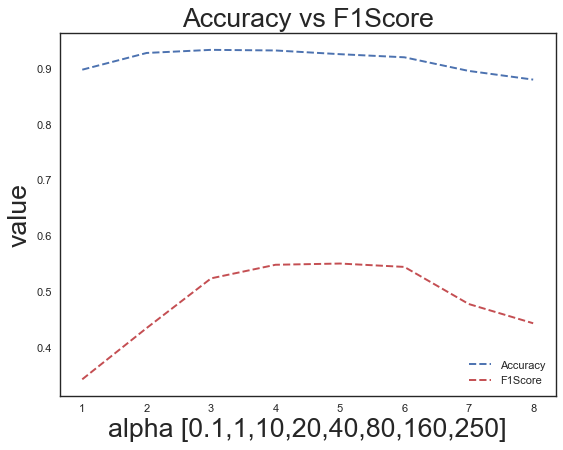

In [30]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range (1, len(accValues) + 1), accValues, 'b--', range(1, len(accValues) + 1), f1Values, 'r--')
plt.xticks(range(1, len(accValues) + 1))
plt.legend(('Accuracy','F1Score'))
plt.xlabel('alpha [0.1,1,10,20,40,80,160,250]')
plt.ylabel('value')
plt.title('Accuracy vs F1Score')
plt.show()

## Lasso

In [31]:
from sklearn import linear_model


In [32]:
print()
print("Lasso:")
alphaValue = [0.0001, 0.0005, 0.001, 0.01,0.1]
accValues = []
f1Values = []

for alph in alphaValue:

    #Train
    clf = linear_model.Lasso(alpha=alph)
    clf.fit(X_train,y_train);
    predictions = clf.predict(X_train)
    for i in range(0, predictions.shape[0]):
        if predictions[i] >= 0.5:
            predictions[i]=1
        else:
            predictions[i]=0
            
    print("alpha: " + str(alph))
    print("Train Accuracy:")
    print(mt.accuracy_score(predictions,y_train))
    
    #Test
    predictions = clf.predict(X_val)
    for i in range(0, predictions.shape[0]):
        if predictions[i] >= 0.5:
            predictions[i]=1
        else:
            predictions[i]=0
            
    print("Test Accuracy:")
    acc =mt.accuracy_score(predictions,y_val)
    print(acc)
    accValues.append(acc)
    print("Precision on test %3.2f" % precision_score(y_val,predictions))
    print("Recall on test  %3.2f" % recall_score(y_val,predictions))
    f1Score =  F1Score( precision_score(y_val,predictions), recall_score(y_val,predictions))
    f1Values.append(f1Score)
    print("F1    %3.2f" % f1Score)

    print()


Lasso:
alpha: 0.0001
Train Accuracy:
0.9834145057259445
Test Accuracy:
0.9311111111111111
Precision on test 0.45
Recall on test  0.54
F1    0.49

alpha: 0.0005
Train Accuracy:
0.9401079373436882
Test Accuracy:
0.9122222222222223
Precision on test 0.39
Recall on test  0.75
F1    0.52

alpha: 0.001
Train Accuracy:
0.8700144793997631
Test Accuracy:
0.8733333333333333
Precision on test 0.30
Recall on test  0.75
F1    0.42

alpha: 0.01
Train Accuracy:
0.7395682506252468
Test Accuracy:
0.7944444444444444
Precision on test 0.18
Recall on test  0.66
F1    0.29

alpha: 0.1
Train Accuracy:
0.5
Test Accuracy:
0.06222222222222222
Precision on test 0.06
Recall on test  1.00
F1    0.12



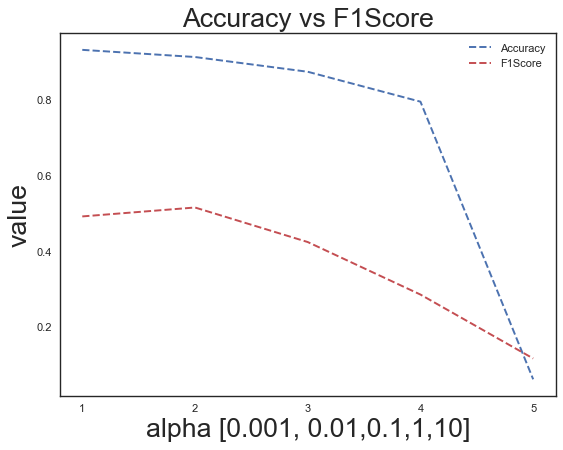

In [33]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range (1, len(accValues) + 1), accValues, 'b--', range(1, len(accValues) + 1), f1Values, 'r--')
plt.xticks(range(1, len(accValues) + 1))
plt.legend(('Accuracy','F1Score'))
plt.xlabel('alpha [0.001, 0.01,0.1,1,10]')
plt.ylabel('value')
plt.title('Accuracy vs F1Score')
plt.show()

## KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [35]:
print()
print("KNN:")
k_range = list(range(1, 30))
accValues = []
f1Values = []
for k in k_range:
    if (k%2 == 1):
        print("k = " + str(k))
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train);
        # fit the model with data
        predictions = knn.predict(X_val)
        
        print("Test Accuracy:")
        acc = mt.accuracy_score(predictions,y_val)
        accValues.append(acc)
        print(acc)
        print("Precision on test %3.2f" % precision_score(y_val,predictions))
        print("Recall on test  %3.2f" % recall_score(y_val,predictions))
        f1Score = F1Score( precision_score(y_val,predictions), recall_score(y_val,predictions))
        f1Values.append(f1Score)
        print("F1    %3.2f" %  f1Score)

        print()



KNN:
k = 1
Test Accuracy:
0.9344444444444444
Precision on test 0.44
Recall on test  0.20
F1    0.27

k = 3
Test Accuracy:
0.9244444444444444
Precision on test 0.32
Recall on test  0.20
F1    0.24

k = 5
Test Accuracy:
0.9188888888888889
Precision on test 0.31
Recall on test  0.25
F1    0.28

k = 7
Test Accuracy:
0.9133333333333333
Precision on test 0.29
Recall on test  0.27
F1    0.28

k = 9
Test Accuracy:
0.9066666666666666
Precision on test 0.27
Recall on test  0.29
F1    0.28

k = 11
Test Accuracy:
0.8955555555555555
Precision on test 0.24
Recall on test  0.30
F1    0.27

k = 13
Test Accuracy:
0.8866666666666667
Precision on test 0.21
Recall on test  0.30
F1    0.25

k = 15
Test Accuracy:
0.8822222222222222
Precision on test 0.22
Recall on test  0.34
F1    0.26

k = 17
Test Accuracy:
0.8733333333333333
Precision on test 0.21
Recall on test  0.38
F1    0.27

k = 19
Test Accuracy:
0.8688888888888889
Precision on test 0.21
Recall on test  0.41
F1    0.28

k = 21
Test Accuracy:
0.86444

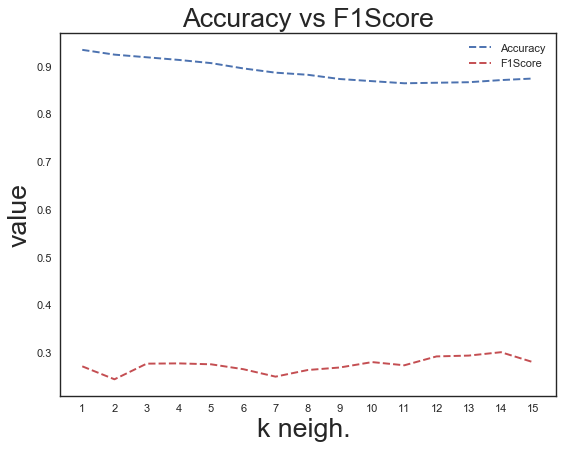

In [36]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range (1, len(accValues) + 1), accValues, 'b--', range(1, len(accValues) + 1), f1Values, 'r--')
plt.xticks(range(1, len(accValues) + 1))
plt.legend(('Accuracy','F1Score'))
plt.xlabel('k neigh. ')
plt.ylabel('value')
plt.title('Accuracy vs F1Score')
plt.show()

# Decision Trees

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [38]:
print()
print("Decision Tree:")
depthValues =  [5,10,15,20,30,40,50,100,150,200]

accValues = []
f1Values = []

for depth in depthValues:
    print("max_depth: " + str(depth))
    dt = tree.DecisionTreeClassifier(max_depth = depth, criterion = 'entropy')
    dt.fit(X_train,y_train);
    #Train
    predictions = dt.predict(X_train)
    acc = mt.accuracy_score(predictions,y_train)
    accValues.append(acc)
    print( "Training Accuracy: " + str(acc))        
    
    #Test
    predictions = dt.predict(X_val)
    print("Test Accuracy:")
    print(mt.accuracy_score(predictions,y_val))
    print("Precision on test %3.2f" % precision_score(y_val,predictions))
    print("Recall on test  %3.2f" % recall_score(y_val,predictions))
    f1Score = F1Score( precision_score(y_val,predictions), recall_score(y_val,predictions))
    f1Values.append(f1Score)
    print("F1    %3.2f" %  f1Score)
    print()


Decision Tree:
max_depth: 5
Training Accuracy: 0.7315387653020929
Test Accuracy:
0.6388888888888888
Precision on test 0.12
Recall on test  0.75
F1    0.21

max_depth: 10
Training Accuracy: 0.80327760958273
Test Accuracy:
0.6944444444444444
Precision on test 0.14
Recall on test  0.75
F1    0.23

max_depth: 15
Training Accuracy: 0.8363169672239041
Test Accuracy:
0.7022222222222222
Precision on test 0.14
Recall on test  0.71
F1    0.23

max_depth: 20
Training Accuracy: 0.8809398446755298
Test Accuracy:
0.92
Precision on test 0.38
Recall on test  0.45
F1    0.41

max_depth: 30
Training Accuracy: 0.9262866921153087
Test Accuracy:
0.8344444444444444
Precision on test 0.21
Recall on test  0.59
F1    0.31

max_depth: 40
Training Accuracy: 0.9614979597209424
Test Accuracy:
0.9255555555555556
Precision on test 0.41
Recall on test  0.43
F1    0.42

max_depth: 50
Training Accuracy: 0.9861129393181519
Test Accuracy:
0.9222222222222223
Precision on test 0.38
Recall on test  0.41
F1    0.40

max_dep

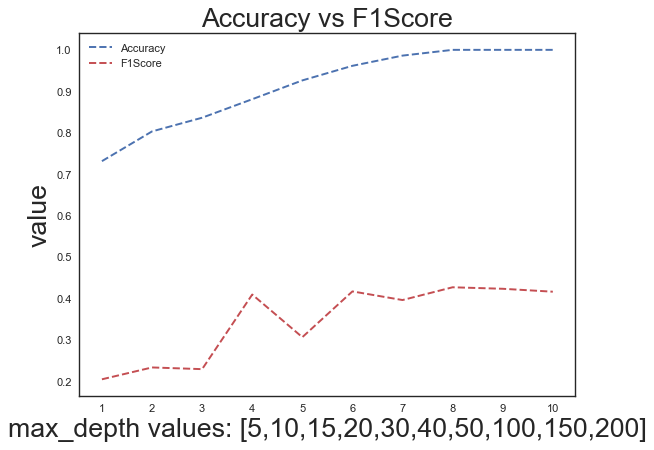

In [39]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range (1, len(accValues) + 1), accValues, 'b--', range(1, len(accValues) + 1), f1Values, 'r--')
plt.xticks(range(1,len(depthValues)+1))
plt.legend(('Accuracy','F1Score'))
plt.xlabel('max_depth values: [5,10,15,20,30,40,50,100,150,200]')
plt.ylabel('value')
plt.title('Accuracy vs F1Score')
plt.show()

## Random Forest

In [40]:
# Import Random Forest model and fit it to the train set
from sklearn.ensemble import RandomForestClassifier

C:\Users\pierv\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [43]:
print()
print("Random Forest:")
estimatorsValues= [40,80,100,150,180,200]
max_depthValues = [5,10,20,30,50,70,100,120]
accValues = []
f1Values = []

for estimator in estimatorsValues:
    for depth in max_depthValues:
        
        #Train
        print("#estimators: " + str(estimator) + "  max_depth: " + str(depth))
        rf = RandomForestClassifier(n_estimators = estimator, max_depth = depth, criterion = "gini")
        rf.fit(X_train, y_train);

        predictions = rf.predict(X_train)
        # check accuracy
        trainacc = mt.accuracy_score(predictions,y_train)
        print("Training Accuracy: " + str(trainacc))
        
        #Test
        predictions = rf.predict(X_val)
        print("Test Accuracy:")
        acc =mt.accuracy_score(predictions,y_val)
        accValues.append(acc)
        print(acc)
        print("Precision on test %3.2f" % precision_score(y_val,predictions))
        print("Recall on test  %3.2f" % recall_score(y_val,predictions))
        f1Score = F1Score( precision_score(y_val,predictions), recall_score(y_val,predictions))
        f1Values.append(f1Score)
        print("F1    %3.2f" %  f1Score)
        print()
        


Random Forest:
#estimators: 40  max_depth: 5
Training Accuracy: 0.80327760958273
Test Accuracy:
0.8844444444444445
Precision on test 0.29
Recall on test  0.57
Recall on test  0.57
F1    0.38

#estimators: 40  max_depth: 10
Training Accuracy: 0.8499407660918784
Test Accuracy:
0.8588888888888889
Precision on test 0.26
Recall on test  0.71
Recall on test  0.71
F1    0.39

#estimators: 40  max_depth: 20
Training Accuracy: 0.8999605107279189
Test Accuracy:
0.8777777777777778
Precision on test 0.28
Recall on test  0.62
Recall on test  0.62
F1    0.39

#estimators: 40  max_depth: 30
Training Accuracy: 0.9412268000526524
Test Accuracy:
0.91
Precision on test 0.35
Recall on test  0.50
Recall on test  0.50
F1    0.41

#estimators: 40  max_depth: 50
Training Accuracy: 0.9712386468342767
Test Accuracy:
0.92
Precision on test 0.33
Recall on test  0.27
Recall on test  0.27
F1    0.29

#estimators: 40  max_depth: 70
Training Accuracy: 0.9875608792944583
Test Accuracy:
0.94
Precision on test 0.54
Rec

Training Accuracy: 1.0
Test Accuracy:
0.9422222222222222
Precision on test 0.83
Recall on test  0.09
Recall on test  0.09
F1    0.16



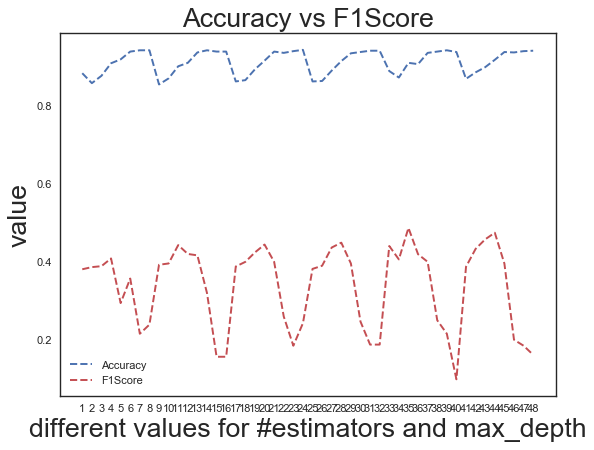

In [44]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range (1, len(accValues) + 1), accValues, 'b--', range(1, len(accValues) + 1), f1Values, 'r--')
plt.xticks(range(1,(len(estimatorsValues) * len(max_depthValues)+1)))
plt.legend(('Accuracy','F1Score'))
plt.xlabel('different values for #estimators and max_depth')
plt.ylabel('value')
plt.title('Accuracy vs F1Score')
plt.show()

# SVM

from sklearn.svm import SVC
CValues = [0.1, 1, 5, 10, 20, 40, 70]
accValues = []
f1Values = []

for c in CValues:
    print("C = " + str(c))
    svmC = SVC(gamma= 'auto', C = c, kernel='rbf')
    svmC.fit(X_train, y_train)
    predictions = svmC.predict(X_train)
    # check accuracy
    trainacc = mt.accuracy_score(predictions,y_train)
    print("Training Accuracy: " + str(trainacc))
        
    #Test
    predictions = svmC.predict(X_val)
    print("Test Accuracy:")
    acc =mt.accuracy_score(predictions,y_val)
    accValues.append(acc)
    print(acc)
    print("Precision on test %3.2f" % precision_score(y_val,predictions))
    print("Recall on test  %3.2f" % recall_score(y_val,predictions))
    f1Score = F1Score( precision_score(y_val,predictions), recall_score(y_val,predictions))
    f1Values.append(f1Score)
    print("F1    %3.2f" %  f1Score)
    print()

plt.plot(range (1, len(accValues) + 1), accValues, 'b--', range(1, len(accValues) + 1), f1Values, 'r--')
plt.xticks(range(1,(len(estimatorsValues) * len(max_depthValues)+1)))
plt.legend(('Accuracy','F1Score'))
plt.xlabel('C = [0.1, 1, 5, 10, 20, 40, 70]')
plt.ylabel('value')
plt.title('Accuracy vs F1Score')
plt.show()